In [12]:
# script to get and plot TTS for rf11 with varying bl conditions
# date created: 3/26/2020
# author: sofia chelpon
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
############################ PREP WORKSPACE ############################

In [1]:
import numpy as np 
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
# read in ratios dataframe
path = "./contrast_ratios_perrf.pkl"
contrast_ratios = pd.read_pickle(path)
ratios_sort = contrast_ratios.sort_values(['TROPO_tau'])
ratios_sort.describe()

,BL_tau,TROPO_tau,UT_tau,RF05_CampAvg,RF06_CampAvg,RF07_CampAvg,RF08_CampAvg,RF09_CampAvg,RF10_CampAvg,RF11_CampAvg,RF12_CampAvg,RF13_CampAvg,RF14_CampAvg,RF15_CampAvg
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000
mean,4796.651974,5209.367958,7809.787861,0.707259,0.794366,0.797524,0.677784,0.714813,0.690294,0.677319,0.645010,0.667508,0.622113,0.634507
std,12310.866884,12235.438946,14154.270719,0.346683,0.262395,0.281263,0.334545,0.330393,0.326252,0.325940,0.369127,0.332680,0.367655,0.337875
min,0.283684,0.321694,0.348720,0.015906,0.011290,0.021048,0.008871,0.015121,0.015295,0.007500,0.011060,0.010782,0.003597,0.004839
25%,4.967936,9.379963,14.577466,0.371346,0.628995,0.637850,0.350622,0.437512,0.422346,0.475872,0.244386,0.360688,0.282358,0.346279
50%,34.047641,91.630861,315.000000,0.810394,0.881438,0.902167,0.800876,0.816740,0.781530,0.756835,0.754059,0.735439,0.701705,0.657804
75%,1200.000000,3900.000000,12000.000000,0.996145,1.005329,0.995594,0.983066,0.996708,0.985938,0.992405,0.979662,0.978759,0.992140,0.980392
max,69000.000000,69000.000000,69000.000000,1.252340,1.083674,1.376010,1.035787,1.094917,1.083656,1.045150,1.049891,1.032809,1.132092,1.087209


In [3]:
# tau, same for all 
tau_bl = ratios_sort['BL_tau'].values
tau_tr = ratios_sort['TROPO_tau'].values

# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_tr)

In [4]:
############################ GET TTS OUTPUTS FOR EA. CASE ############################

In [6]:
# rf05 
utbl_05 = ratios_sort['RF05_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_05, my_r2_cavg_05, my_gf_cavg_05, my_t_cavg_05, mean_age_cavg_05,  \
    mode_age_cavg_05, best_k_cavg_05 = tts_mod.get_tts(utbl_05, tau_tr, t, exp_decay_matrix, LT)

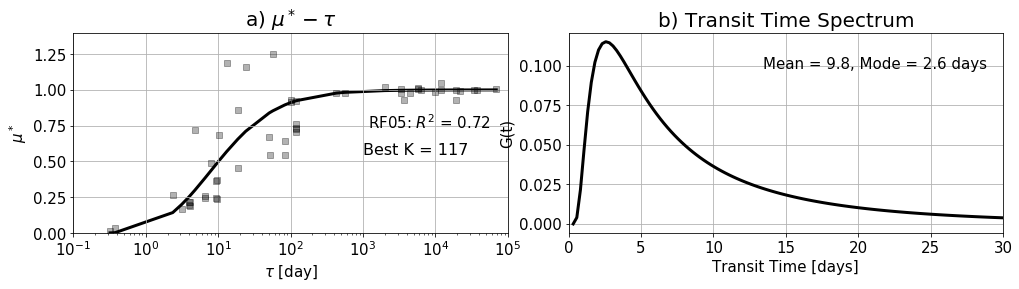

In [12]:

# --------------- start plot with campaign avg bl
title_str = 'RF05: '
#my_color = [0, 0.42, 0.31] # bottle green 
my_color = 'k'
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_05, utbl_05, my_r2_cavg_05, 
                        my_gf_cavg_05, my_t_cavg_05, mean_age_cavg_05, mode_age_cavg_05, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_05), fontsize = 16)
fig.savefig('./tts_per_rf_figs/tts_rf05.pdf')  


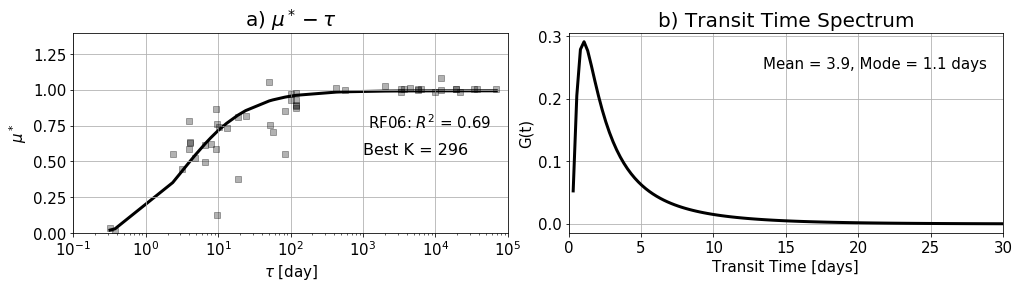

In [13]:
#rf06 
utbl_06 = ratios_sort['RF06_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_06, my_r2_cavg_06, my_gf_cavg_06, my_t_cavg_06, mean_age_cavg_06,  \
    mode_age_cavg_06, best_k_cavg_06 = tts_mod.get_tts(utbl_06, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF06: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_06, utbl_06, my_r2_cavg_06, 
                        my_gf_cavg_06, my_t_cavg_06, mean_age_cavg_06, mode_age_cavg_06, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_06), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf06.pdf')  


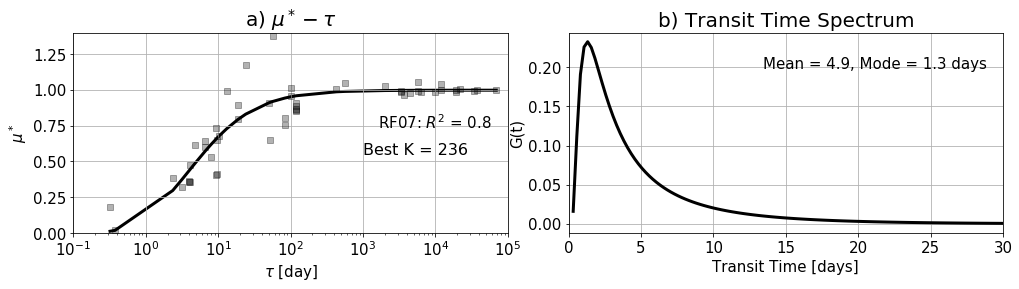

In [14]:
# rf07 
utbl_07 = ratios_sort['RF07_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_07, my_r2_cavg_07, my_gf_cavg_07, my_t_cavg_07, mean_age_cavg_07,  \
    mode_age_cavg_07, best_k_cavg_07 = tts_mod.get_tts(utbl_07, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF07: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_07, utbl_07, my_r2_cavg_07, 
                        my_gf_cavg_07, my_t_cavg_07, mean_age_cavg_07, mode_age_cavg_07, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_07), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf07.pdf')  


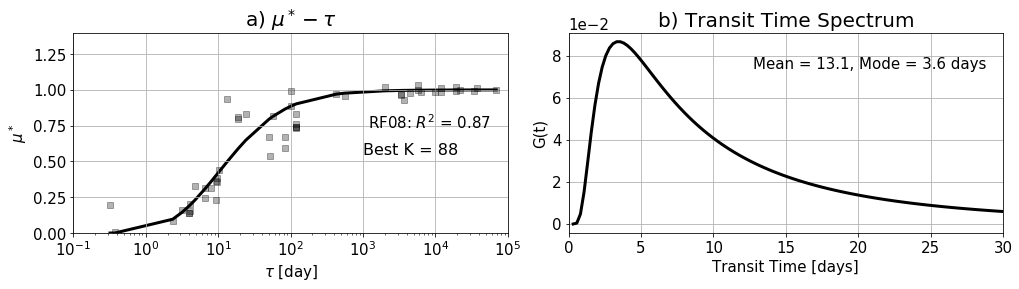

In [15]:
# rf08 
utbl_08 = ratios_sort['RF08_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_08, my_r2_cavg_08, my_gf_cavg_08, my_t_cavg_08, mean_age_cavg_08,  \
    mode_age_cavg_08, best_k_cavg_08 = tts_mod.get_tts(utbl_08, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF08: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_08, utbl_08, my_r2_cavg_08, 
                        my_gf_cavg_08, my_t_cavg_08, mean_age_cavg_08, mode_age_cavg_08, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_08), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf08.pdf')  


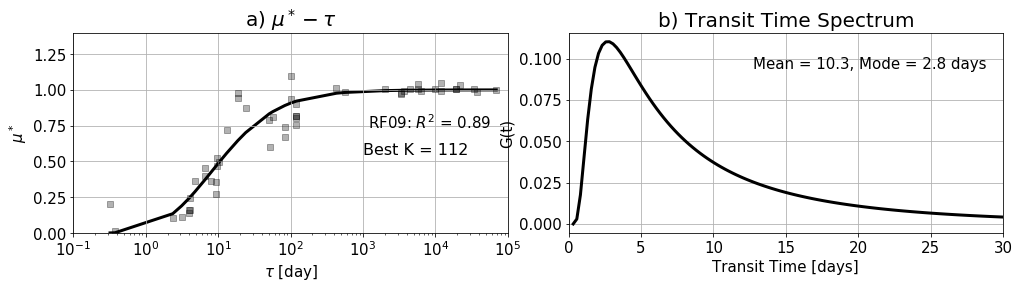

In [16]:
# rf09 
utbl_09 = ratios_sort['RF09_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_09, my_r2_cavg_09, my_gf_cavg_09, my_t_cavg_09, mean_age_cavg_09,  \
    mode_age_cavg_09, best_k_cavg_09 = tts_mod.get_tts(utbl_09, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF09: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_09, utbl_09, my_r2_cavg_09, 
                        my_gf_cavg_09, my_t_cavg_09, mean_age_cavg_09, mode_age_cavg_09, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_09), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf09.pdf')  


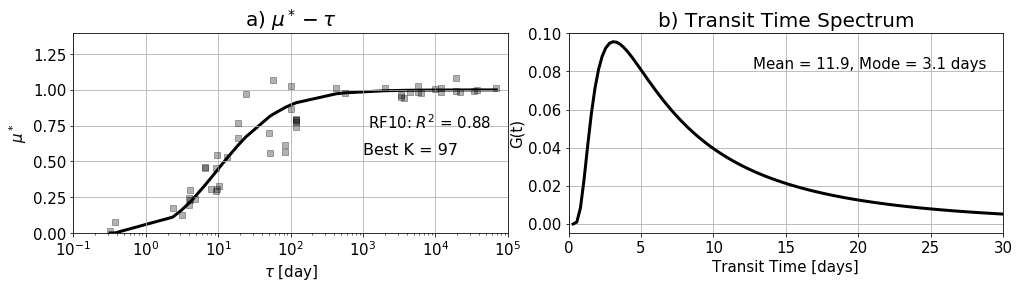

In [17]:
# rf10 
utbl_10 = ratios_sort['RF10_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_10, my_r2_cavg_10, my_gf_cavg_10, my_t_cavg_10, mean_age_cavg_10,  \
    mode_age_cavg_10, best_k_cavg_10 = tts_mod.get_tts(utbl_10, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF10: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_10, utbl_10, my_r2_cavg_10, 
                        my_gf_cavg_10, my_t_cavg_10, mean_age_cavg_10, mode_age_cavg_10, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_10), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf10.pdf')  


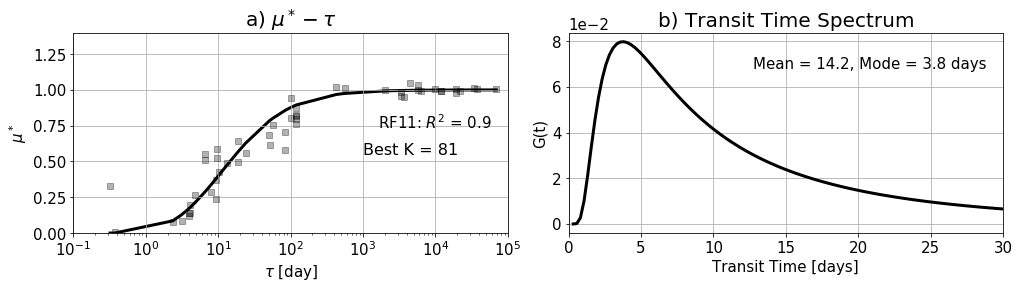

In [18]:
# rf11
utbl_11 = ratios_sort['RF11_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_11, my_r2_cavg_11, my_gf_cavg_11, my_t_cavg_11, mean_age_cavg_11,  \
    mode_age_cavg_11, best_k_cavg_11 = tts_mod.get_tts(utbl_11, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF11: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_11, utbl_11, my_r2_cavg_11, 
                        my_gf_cavg_11, my_t_cavg_11, mean_age_cavg_11, mode_age_cavg_11, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_11), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf11.pdf')  


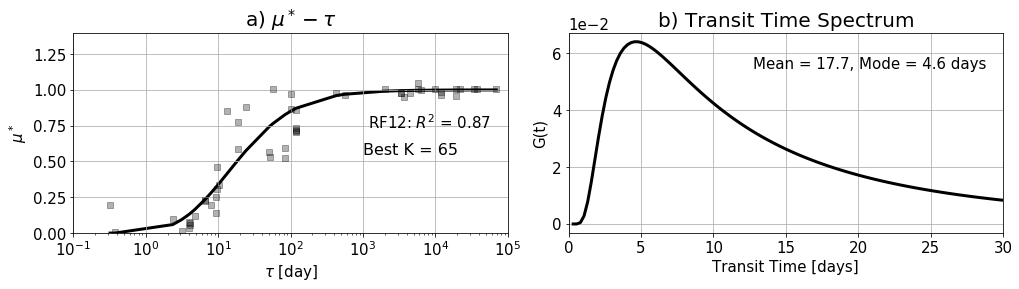

In [19]:
# rf12 
utbl_12 = ratios_sort['RF12_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_12, my_r2_cavg_12, my_gf_cavg_12, my_t_cavg_12, mean_age_cavg_12,  \
    mode_age_cavg_12, best_k_cavg_12 = tts_mod.get_tts(utbl_12, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF12: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_12, utbl_12, my_r2_cavg_12, 
                        my_gf_cavg_12, my_t_cavg_12, mean_age_cavg_12, mode_age_cavg_12, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_12), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf12.pdf')  


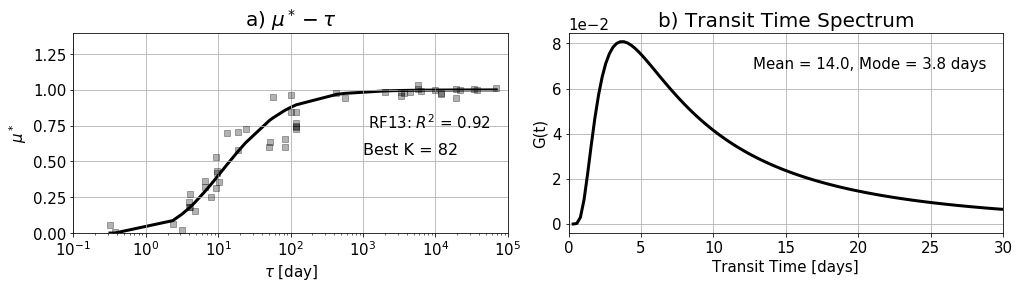

In [20]:
# rf13 
utbl_13 = ratios_sort['RF13_CampAvg']

# BL TAU -----
# get tts 
my_mustar_cavg_13, my_r2_cavg_13, my_gf_cavg_13, my_t_cavg_13, mean_age_cavg_13,  \
    mode_age_cavg_13, best_k_cavg_13 = tts_mod.get_tts(utbl_13, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF13: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_13, utbl_13, my_r2_cavg_13, 
                        my_gf_cavg_13, my_t_cavg_13, mean_age_cavg_13, mode_age_cavg_13, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_13), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf13.pdf')  


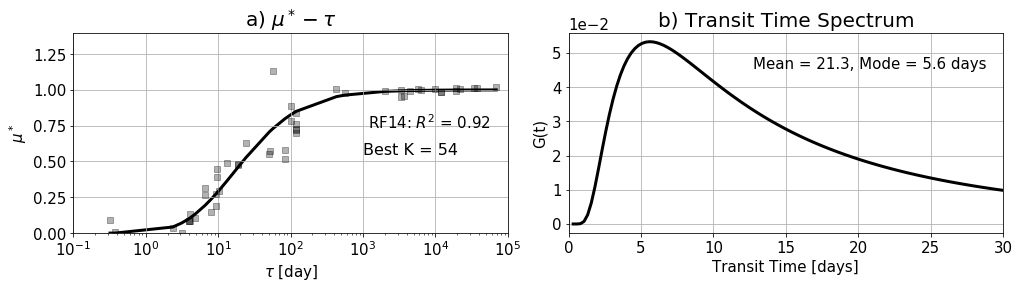

In [21]:
# rf14
utbl_full = np.array(ratios_sort['RF14_CampAvg'].values, dtype=np.float64)
utbl_not_null_idx = np.argwhere(~np.isnan(utbl_full))
# ----- inputs without nans 
utbl_14 = utbl_full[utbl_not_null_idx]
tau_tr = tau_tr[utbl_not_null_idx]
    
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_tr)    
    
# BL TAU -----
# get tts 
my_mustar_cavg_14, my_r2_cavg_14, my_gf_cavg_14, my_t_cavg_14, mean_age_cavg_14,  \
    mode_age_cavg_14, best_k_cavg_14 = tts_mod.get_tts(utbl_14, tau_tr, t, exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF14: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_14, utbl_14, my_r2_cavg_14, 
                        my_gf_cavg_14, my_t_cavg_14, mean_age_cavg_14, mode_age_cavg_14, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_14), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf14.pdf')  


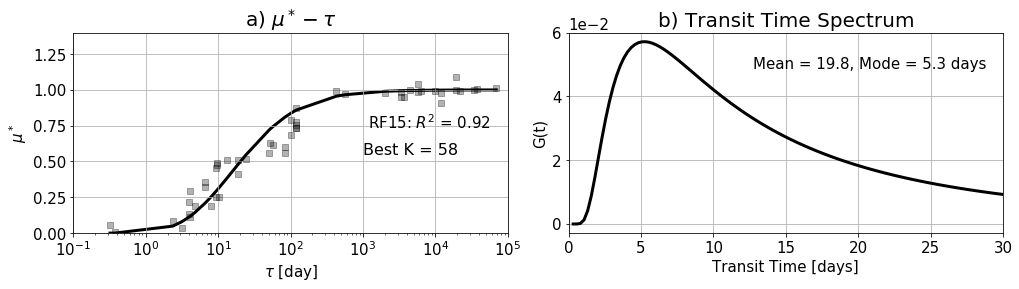

In [34]:
# rf14
utbl_full = np.array(ratios_sort['RF15_CampAvg'].values, dtype=np.float64)
#utbl_not_null_idx = np.argwhere(~np.isnan(utbl_full))
# ----- inputs without nans 
#utbl_15 = utbl_full[utbl_not_null_idx]
#tau_tr = tau_tr[utbl_not_null_idx]
utbl_15 = utbl_full
tau_tr = ratios_sort['TROPO_tau'].values
# get gf inputs, same for all 
t, exp_decay_matrix, LT = tts_mod.prep_for_tts(tau_tr)    
    
# BL TAU -----
# get tts 
my_mustar_cavg_15, my_r2_cavg_15, my_gf_cavg_15, my_t_cavg_15, mean_age_cavg_15,  \
    mode_age_cavg_15, best_k_cavg_15 = tts_mod.get_tts(utbl_15, tau_tr, t, \
                                                       exp_decay_matrix, LT)

# --------------- start plot with campaign avg bl
title_str = 'RF15: '
overplot = 0
add_scatter = 1
add_r2 = 1 
add_meanmode = 1
# first plot only, dummies (will get real after first run creates fig)
width = 0
height = 0
my_ax = 0

fig, my_ax, width, height = tts_mod.plot_tts(tau_tr, my_mustar_cavg_15, utbl_15, my_r2_cavg_15, 
                        my_gf_cavg_15, my_t_cavg_15, mean_age_cavg_15, mode_age_cavg_15, 
                        my_color, overplot, add_scatter, add_r2, 
                        add_meanmode, my_ax, width, height, title_str)
my_ax[0].set_ylim([0, 1.4])
my_ax[0].text(10**3, 0.55, 'Best K = '+str(best_k_cavg_15), fontsize = 16)

fig.savefig('./tts_per_rf_figs/tts_rf15.pdf')  
